In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from src.models.classification import Classification
from src.models.model_selection import grid_search, feature_selector
from src.models.utils import get_run

In [2]:
# read config
with open('config.yml', 'r') as file:
    config=yaml.load(file, Loader= yaml.SafeLoader)
del file

In [3]:
# load data
df = pd.read_csv(config['data_loader']['path'])

df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:-1], df['Class']
    , test_size=config['model_selection']['test_set_size']
    , random_state=123
    , shuffle=True
    )

In [5]:
hyper_params = {
    'logistic_regression': {
        'tol': [0.0001, 0.00005]
        , 'max_iter': [100]
        }
    #, 'support_vector_machine': {
    #    'tol': [0.01, 0.001]
    #}
    , 'decision_tree': {
        'max_depth': [20]
        , 'min_samples_leaf': [2, 5]
        , 'max_leaf_nodes': [10]
        }
    , 'random_forest': {
        'n_estimators': [10, 20]
        , 'max_depth': [20]
        , 'min_samples_leaf': [2, 5]
        , 'max_leaf_nodes': [10]
        }
    , 'xgboost': {
        'n_estimators': [10, 20]
        , 'max_depth': [20]
        }
    }

In [6]:
grid_search(
    X=X_train
    , y=y_train
    , hyper_params=hyper_params
    , cv=config['model_selection']['cross_validator']
    , scoring_metric=config['model_selection']['scoring_metric']
)

c:\Users\gonpr\ML_Projects\Fraud\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gonpr\ML_Projects\Fraud\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

🏃 View run logistic_regression at: http://127.0.0.1:5000/#/experiments/261576866341204158/runs/c1d08b2ab2f6438290ce9eb32e04e9f9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/261576866341204158


c:\Users\gonpr\ML_Projects\Fraud\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run decision_tree at: http://127.0.0.1:5000/#/experiments/261576866341204158/runs/0d5200e03bf8481cb0453308ffa37277
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/261576866341204158


c:\Users\gonpr\ML_Projects\Fraud\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run random_forest at: http://127.0.0.1:5000/#/experiments/261576866341204158/runs/5a5e22d84f604158b4a288addbbdfc47
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/261576866341204158


c:\Users\gonpr\ML_Projects\Fraud\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run xgboost at: http://127.0.0.1:5000/#/experiments/261576866341204158/runs/550a086de7704579832ff504a92e6215
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/261576866341204158
🏃 View run algorithm_evaluation at: http://127.0.0.1:5000/#/experiments/261576866341204158/runs/81f157e4872042e4acc37ed9d6d181c8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/261576866341204158


In [7]:
# select best algorithm and its hyper-params
best_algorithm, best_hyper_params = get_run(
    experiment_names=['model_evaluation']
    , order_by_metric=True
    , metric_name=config['model_selection']['scoring_metric']
    , num=0
)

# greedy feature selection
best_features = feature_selector(
    X=X_train
    , y=y_train
    , algorithm=best_algorithm
    , algorithm_params=best_hyper_params
    , tol=config['model_selection']['tolerance']
    , cv=config['model_selection']['cross_validator']
    , scoring_metric=config['model_selection']['scoring_metric']
)

In [8]:
# fit best algorithm on most important features of training data 
clf = Classification(algorithm=best_algorithm, **best_hyper_params)
clf.fit(X=X_train[best_features], y=y_train)
# predict target value for the test set
y_pred = clf.predict(X_test[best_features])

Accuracy : 0.9962
Precision: 0.99395
Recall   : 0.99853
F1-Score : 0.99624


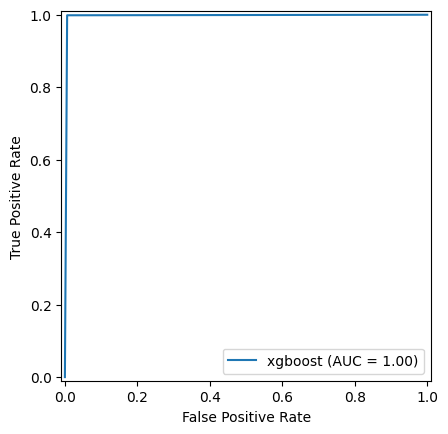

In [9]:
from sklearn.metrics import (
    accuracy_score
    , precision_score, recall_score, f1_score
    , roc_curve, auc, RocCurveDisplay
)

print(
    f"""Accuracy : {round(accuracy_score(y_test, y_pred), 5)}
Precision: {round(precision_score(y_test, y_pred), 5)}
Recall   : {round(recall_score(y_test, y_pred), 5)}
F1-Score : {round(f1_score(y_test, y_pred), 5)}"""
)

fpr, tpr, thresholds = roc_curve(
    y_true=y_test
    , y_score=y_pred
    , drop_intermediate=False
    )
roc_auc = auc(x=fpr, y=tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc,
    estimator_name=best_algorithm
    )
display.plot()
plt.show()